## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [13]:
# you code here
%matplotlib inline
import numpy as np
random_data = np.random.random((20, 2))


In [2]:
random_data

array([[0.6732771 , 0.02034011],
       [0.15470633, 0.43207366],
       [0.89202591, 0.93360648],
       [0.02963903, 0.04326825],
       [0.89611114, 0.72348717],
       [0.92212114, 0.36568262],
       [0.54273665, 0.63459355],
       [0.48611477, 0.69458847],
       [0.74085966, 0.46452147],
       [0.1760546 , 0.2049829 ],
       [0.51887482, 0.19852042],
       [0.73434458, 0.52001786],
       [0.07074944, 0.00863691],
       [0.81448395, 0.21409189],
       [0.88491448, 0.19565739],
       [0.39802418, 0.6315374 ],
       [0.53567821, 0.63105019],
       [0.58748597, 0.39933082],
       [0.12244816, 0.97254899],
       [0.14427584, 0.07916731]])

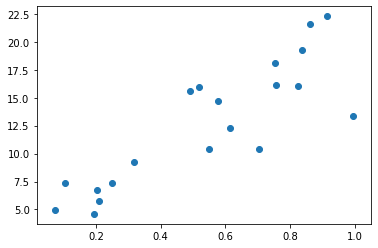

In [14]:
import matplotlib.pyplot as plt
X = random_data[:, 0]
y = random_data[:, 1]
import random
def assuming_function(x):
    return 13.4 * x + 5+ random.randint(-5, 5)
y = [assuming_function(x) for x in X]
plt.scatter(X, y)

In [15]:
y =  np.array(y)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [16]:
reg.score(X.reshape(-1, 1), y)
reg.coef_

array([16.07321727])

In [17]:
reg.intercept_

3.9625755645752427

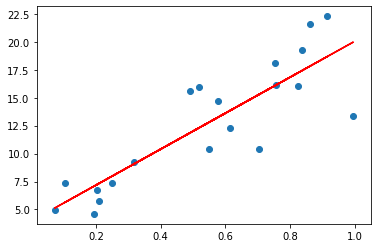

In [18]:
def f(x): 
    return reg.coef_ * x + reg.intercept_
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [19]:
X

array([0.86172201, 0.51834218, 0.49155434, 0.75420696, 0.82555434,
       0.24987685, 0.0725185 , 0.70321454, 0.19541341, 0.57714613,
       0.99589861, 0.83794764, 0.31720271, 0.91546264, 0.55037463,
       0.6160965 , 0.10353826, 0.20885975, 0.20251476, 0.75682091])

In [20]:
reg.predict([[0.9]])

array([18.42847111])

In [21]:
#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [22]:
# you code here
from scipy.spatial.distance import cosine
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

def distance(x1, x2):
    return cosine(x1, x2)

def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    y_hats = [_y for x, _y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)

In [23]:
X, y

(array([0.86172201, 0.51834218, 0.49155434, 0.75420696, 0.82555434,
        0.24987685, 0.0725185 , 0.70321454, 0.19541341, 0.57714613,
        0.99589861, 0.83794764, 0.31720271, 0.91546264, 0.55037463,
        0.6160965 , 0.10353826, 0.20885975, 0.20251476, 0.75682091]),
 array([21.54707492, 15.94578525, 15.58682818, 18.10637326, 16.06242817,
         7.34834975,  4.9717479 , 10.42307477,  4.61853963, 14.73375818,
        13.34504141, 19.22849832,  9.25051631, 22.26719942, 10.37502005,
        12.25569308,  7.3874127 ,  5.79872064,  6.71369776, 16.14140022]))

In [24]:
myself_knn = model(X, y)

In [25]:
predict(0.9)

[(0.8617220086280972, 21.547074915616506), (0.5183421830916215, 15.94578525342773), (0.4915543414673189, 15.586828175662074), (0.7542069595957787, 18.106373258583435), (0.8255543408921856, 16.06242816795529)]


17.449697954249007

#### 3. Re-code the Decision Tree, which could sort the features by ç. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [26]:
from collections import Counter
import numpy as np

In [27]:
# you code here
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


In [28]:
# split_by_gender: 
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# 我们最希望找到一种feature， split_by_some_feature: 
# split_by_pet
entropy([1, 1, 1, 1]) + entropy([0, 0, 0])

1.198849312913621
0.6730116670092565
0.6730116670092565


-0.0

In [29]:
set(mock_data['family_number'])

{1, 2}

In [30]:
set(mock_data['gender'])

{'F', 'M'}

In [31]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [32]:
splited_data = dataset[dataset['family_number'] == 1]

In [33]:
splited_data

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [34]:
splited_data[splited_data['income'] == '+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [35]:
splited_data[splited_data['income'] == '-10']

,gender,income,family_number,pet,bought
1,F,-10,1,1,1


In [36]:
# split by gender
entropy([1, 1, 0]) + entropy([0, 0])

0.6365141682948128

In [37]:
# split by income
entropy([1, 0, 0, 0]) + entropy([1])

0.5623351446188083

In [38]:
sub_split_1

[1, 1, 0, 0, 0]

In [39]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [40]:
entropy(sub_split_1) + entropy(sub_split_2)

0.6730116670092565

In [41]:
sub_split_2

[1, 1]

In [42]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()

In [43]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()

In [44]:
_sub_split_1

[0, 0, 1]

In [45]:
_sub_split_2

[1, 1, 1, 0]

In [46]:
entropy(_sub_split_1) + entropy(_sub_split_2)

1.198849312913621

In [47]:
entropy(sub_split_1) + entropy(sub_split_2)

0.6730116670092565

In [48]:
set(dataset.columns.tolist()) - {'bought'}

{'family_number', 'gender', 'income', 'pet'}

In [49]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        print(f)
        values = set(training_data[f])
        print(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            print(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            print(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            print(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
            print(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            print(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    return spliter

In [50]:
find_the_optimal_spilter(training_data=dataset, target='bought')

family_number
{1, 2}
[1, 1, 0, 0, 0]
0.6730116670092565
[1, 1]
-0.0
0.6730116670092565
[1, 1, 0, 0, 0]
-0.0
[1, 1]
0.6730116670092565
0.6730116670092565
income
{'+10', '-10'}
[1, 1, 0, 0, 0]
0.6730116670092565
[1, 1]
-0.0
0.6730116670092565
[1, 1, 0, 0, 0]
-0.0
[1, 1]
0.6730116670092565
0.6730116670092565
gender
{'M', 'F'}
[1, 1, 0, 0, 0]
0.6365141682948128
[1, 1]
0.5623351446188083
1.198849312913621
[1, 1, 0, 0, 0]
0.5623351446188083
[1, 1]
0.6365141682948128
1.198849312913621
pet
{0, 1}
[1, 1, 0, 0, 0]
-0.0
[1, 1]
-0.0
-0.0
[1, 1, 0, 0, 0]
-0.0
[1, 1]
-0.0
-0.0
spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

In [51]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,pet,bought
2,F,+10,2,1,1
6,M,-10,2,1,1


In [52]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [53]:
find_the_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

family_number
{1}
[1, 1, 0, 0, 0]
0.6730116670092565
[1, 1]
0
0.6730116670092565
income
{'+10', '-10'}
[1, 1, 0, 0, 0]
0.5623351446188083
[1, 1]
-0.0
0.5623351446188083
[1, 1, 0, 0, 0]
-0.0
[1, 1]
0.5623351446188083
0.5623351446188083
gender
{'M', 'F'}
[1, 1, 0, 0, 0]
-0.0
[1, 1]
0.6365141682948128
0.6365141682948128
[1, 1, 0, 0, 0]
0.6365141682948128
[1, 1]
-0.0
0.6365141682948128
pet
{0, 1}
[1, 1, 0, 0, 0]
-0.0
[1, 1]
-0.0
-0.0
[1, 1, 0, 0, 0]
-0.0
[1, 1]
-0.0
-0.0
spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

In [54]:
fm_n_1 = dataset[dataset['family_number'] == 1]
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [55]:
# split_gender 
print(entropy([1, 0]) + entropy([0, 0]))

# split_family_number
print(entropy([1, 0, 0, 0]))

0.6931471805599453
0.5623351446188083


In [56]:
fm_n_1[fm_n_1['income'] != '+10']

,gender,income,family_number,pet,bought
1,F,-10,1,1,1


In [57]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [58]:
find_the_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

family_number
{1}
[1, 1, 0, 0, 0]
0.5623351446188083
[1, 1]
0
0.5623351446188083
income
{'+10'}
[1, 1, 0, 0, 0]
0.5623351446188083
[1, 1]
0
0.5623351446188083
gender
{'M', 'F'}
[1, 1, 0, 0, 0]
-0.0
[1, 1]
0.6931471805599453
0.6931471805599453
[1, 1, 0, 0, 0]
0.6931471805599453
[1, 1]
-0.0
0.6931471805599453
pet
{0, 1}
[1, 1, 0, 0, 0]
-0.0
[1, 1]
-0.0
-0.0
[1, 1, 0, 0, 0]
-0.0
[1, 1]
-0.0
-0.0
spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [59]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

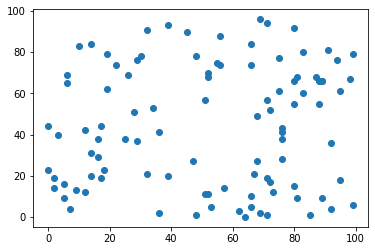

In [60]:
X1 = [np.random.randint(0, 100) for _ in range(100)]
X2 = [np.random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)

In [61]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [62]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [63]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
cluster.cluster_centers_

array([[55.78571429,  8.        ],
       [57.57142857, 80.92857143],
       [21.15384615, 71.84615385],
       [84.3       , 65.5       ],
       [80.47058824, 20.23529412],
       [13.22727273, 26.22727273]])

In [65]:
cluster.labels_

array([3, 5, 1, 0, 4, 4, 2, 2, 1, 1, 0, 0, 4, 4, 3, 4, 3, 4, 3, 0, 3, 3,
       3, 3, 5, 3, 0, 2, 0, 3, 2, 5, 2, 3, 5, 0, 5, 1, 5, 1, 5, 0, 4, 5,
       4, 5, 5, 5, 0, 3, 1, 4, 4, 3, 0, 1, 2, 2, 5, 4, 2, 0, 3, 2, 5, 5,
       0, 5, 1, 3, 4, 2, 0, 4, 5, 5, 5, 4, 3, 1, 0, 1, 1, 5, 5, 2, 1, 3,
       4, 4, 3, 1, 3, 3, 5, 1, 2, 4, 5, 2], dtype=int32)

In [66]:
from collections import defaultdict

In [67]:
centers = defaultdict(list)

In [68]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

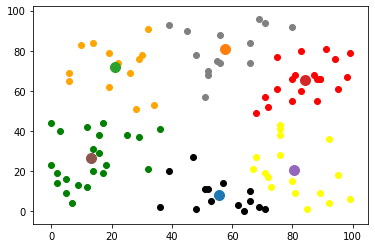

In [69]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:Lets disucss the supervised machine learning. A model is a function which takes parameters, as called features, to give a value for classification or regression. More specifically, a model takes known samples through a calculation to produce a unknown result. The model should perform well with test samples and fit the unknown samples.

We cannot have the full data but a part as samples. Therefore, we cannot guarantee the current model can cover all the data but only a model that can perform well in the currently held samples. From this point, we can say that in a certain condition the model can provide a result which can fit the needs.  

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: Underfitting the model fails to recognize the real complexities in the data. The model assumes that noise is greater than it really is and thus uses a too simplistic shape.
The reasons:
the difference of test and traning data set is large;
the error of tranining data set is large;
don't have complete information,
don't know how noisy the data is,
don't know in advance the underlying function that generated our data, and thus the optimal model complexity

Data is noisy, meaning that there are some deviations from reality that makes it harder for us to see their true relationship with our explaining factors. Also, it is usually not complete.
The reasons:
measurement errors, 
influentially random factors, 
unobserved variables,
rubbish correlations,
uncomplete samples

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: 
  True positive(TP): the predication is positive and is correct

  False positive(FP): the predication is positive but is uncorrect

  False negative(FN): the predication is negative but is uncorrect

  True negative(TN): the predication is negative and is correct
  
   Precision: TP/(Tp+ Fp), aims to recognize the percentage of true positive in all the positive samples.
   
   Recall: TP/(TP+FN), aims to find the percentage of the true psotive in all the ground truth
   
   F1_score:2PrecisionRecall/(Recall+ Precision), aims to balance the recall and precision
   
   F2_score: a weighted average of precision and recall
   
   AUC: the area under the ROC curve. ROC stands for the relationship of TPR(True positive rate) and FPR(false positive rate). The best scenario is FPR=0 and TPR= 1. AUC values are from 0.5 to 1 and the larger, the better. It is not affected by the 'proper calibration' or unbalanced classes and convenient to compare with more than 2 classifiers.

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: Machine learning bases on the given data or historical data to calculate a value and compare it with the true data to keep re-correcting the value instead of adding more if-else codes in the traditional coding.
We let the computer to learn the general pattern from the data and re-correct itself.

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

In [ ]:
Ans: Machine learning generally includes two parts: prototyping and  deployed. Prototyping is to train one or 
    more models and do validation and offline evaluation to obtain better performance models. The deployed phase 
    is to do online evaluation and update the data and model with the new production data. The measurements in the
    two phases are different. In the first phase, we usually take accuracy, precision-recall while in the online 
    evaluation we take business logics as customer lifetime value, click through rate, customer churn rate and so on.
    Even in the model traning and validation process, the measurement may be different.
    
    Meanwhile, the data set in the two phases are different, historical data and live data. In most models, we assume
    the data pattern keeps the same but in reality they are not. This is distribution drift. We need to capture such drift
    when traning the models and keep tracking them. If the measurements can meet the requirements when building the models,
    then it means the model can fit. 
    
    Different models have different measurements. For example, the binary classifier can take accuracy, log-loss and AUC. 
    In the stock prediction case, the root mean square error is a good one. 
    
    After a good offline evaluation, we need to take online evaluation. In this case, we may take A/B testing and meet the
    problem of how to choose the test and traning data set and so on.
    
    In a word, the evaluation is very important in each step of the machine learning.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [4]:
# you code here
def find_the_optimal_spilter(feature1: str, feature2: int, feature3: int, target: str) -> str:
#     x_fields = set(training_data.columns.tolist()) - {target} - {'pet'}
    x_fields = {'family_number', 'gender', 'income'}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        print(f)
        values = set(training_data[f])
        print(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            print(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            print(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            print(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
            print(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            print(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    return spliter
def predicate(gender:str, income:int, family_number:int):
    
    return 0

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [5]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)